In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

C:\Users\valer\AppData\Local\Temp\ipykernel_3540\3802894244.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Чтение датасетов

In [2]:
df_ndvi = pd.read_csv('train/train/NDVI.csv', sep=",", encoding="windows-1251").drop(columns=['index'])
df_blue = pd.read_csv('train/train/B02.csv', sep=",", encoding="windows-1251").drop(columns=['index'])
df_green = pd.read_csv('train/train/B03.csv', sep=",", encoding="windows-1251").drop(columns=['index'])
df_red = pd.read_csv('train/train/B04.csv', sep=",", encoding="windows-1251").drop(columns=['index'])
df_nir = pd.read_csv('train/train/B8A.csv', sep=",", encoding="windows-1251").drop(columns=['index'])
df_swir = pd.read_csv('train/train/B12.csv', sep=",", encoding="windows-1251").drop(columns=['index'])

Обработка пропусков

In [3]:
df_ndvi.isna().sum()

121        610
128        545
135        583
142        578
149        587
156        583
163        601
170        566
177        608
184        579
191        604
198        632
205        572
212        591
219        611
226        589
233        575
240        591
247        555
254        595
261        548
268        583
275        532
282        601
289        596
296        572
culture      0
dtype: int64

<Axes: >

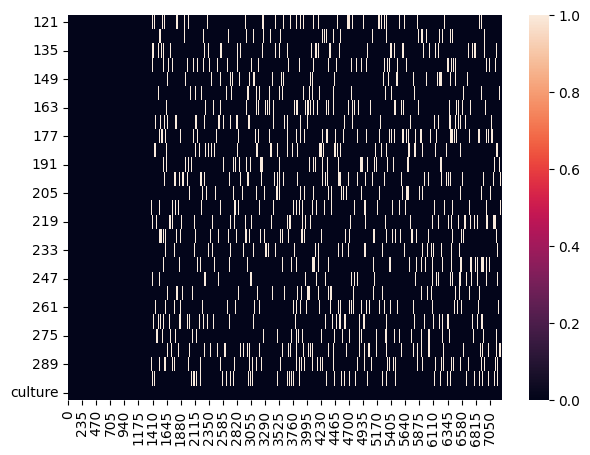

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(df_ndvi.isna().transpose())
#визуализация

Так как у нас временной ряд, а пропуски расположены точечно, то использую метод заполнения пропусков - линейная интерполяция, позволяющая взять заполненные значения соседей пропуска и заполнить пропуск их средним

In [5]:
df_ndvi = df_ndvi.interpolate(method='linear')
df_blue = df_blue.interpolate(method='linear')
df_green = df_green.interpolate(method='linear')
df_red = df_red.interpolate(method='linear')
df_nir = df_nir.interpolate(method='linear')
df_swir = df_swir.interpolate(method='linear')

C:\Users\valer\AppData\Local\Temp\ipykernel_3540\1524418956.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_ndvi = df_ndvi.interpolate(method='linear')
C:\Users\valer\AppData\Local\Temp\ipykernel_3540\1524418956.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_blue = df_blue.interpolate(method='linear')
C:\Users\valer\AppData\Local\Temp\ipykernel_3540\1524418956.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_green = df_green.interpolate(method='linear')
C:\Users\valer\AppData\Local\Temp\ipykernel_3540\1524418956.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will

Работа с выбросами

['овощи', 'соя', 'кукуруза', 'залежь', 'многолетние травы', 'зерновые']


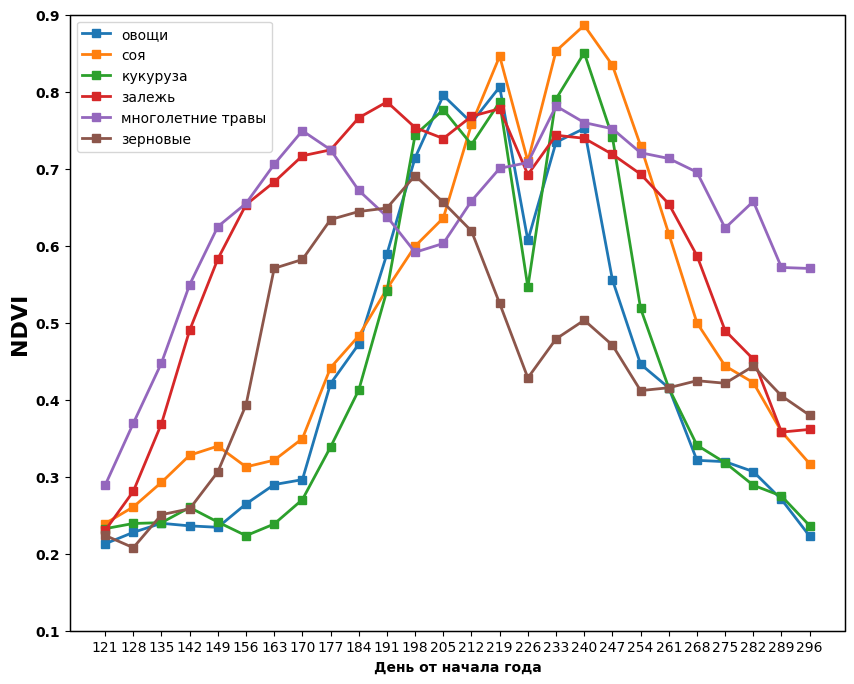

In [6]:
cul = list(df_ndvi['culture'].unique().tolist())
print(cul)
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([0.1, 0.9])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_ndvi.loc[(df_ndvi['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

Можно заметить заметный выброс в 226 и 240 дни, попробуем заменить этот выброс средним соседей

In [7]:
df_ndvi['226'] = (df_ndvi['219'] + df_ndvi['233']) / 2
df_ndvi['240'] = (df_ndvi['226'] + df_ndvi['247']) / 2

['овощи', 'соя', 'кукуруза', 'залежь', 'многолетние травы', 'зерновые']


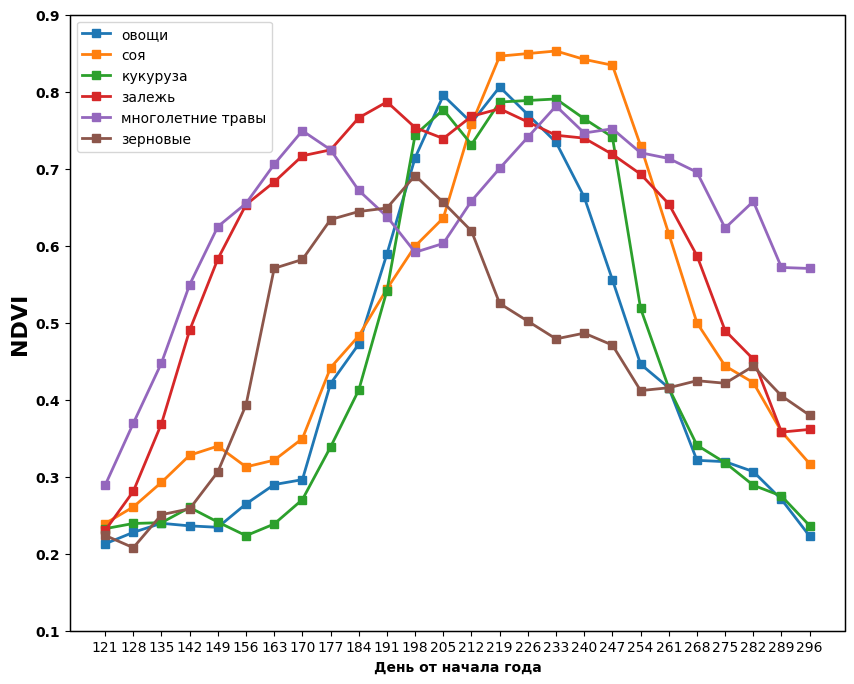

In [8]:
cul = list(df_ndvi['culture'].unique().tolist())
print(cul)
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([0.1, 0.9])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_ndvi.loc[(df_ndvi['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

Дополнительные признаки

$NDWI = \frac{NIR - SWIR}{NIR + SWIR}$

<br>

$NEW\_FEATURE = NDVI * NDWI$



Источник: https://www.soft.farm/ru/blog/vegetacionnye-indeksy-ndvi-evi-gndvi-cvi-true-color-140

In [9]:
df_features = df_ndvi.copy()  # Создадим таблицу для используемых признаков

for day in xx:  # Переберем все дни и создадим новый признак для каждого дня
    df_features[f"{day}_NDWI"] = (df_nir[day] - df_swir[day]) / (df_nir[day] + df_swir[day])
    df_features[f"{day}_NEW"] = df_ndvi[day] * df_features[f"{day}_NDWI"]

In [10]:
df_ndwi = pd.DataFrame()
for cul in df_features.columns:
    if str(cul)[-5:] == '_NDWI':
        df_ndwi[cul] = df_features[cul]
df_ndwi['culture'] = df_features['culture']

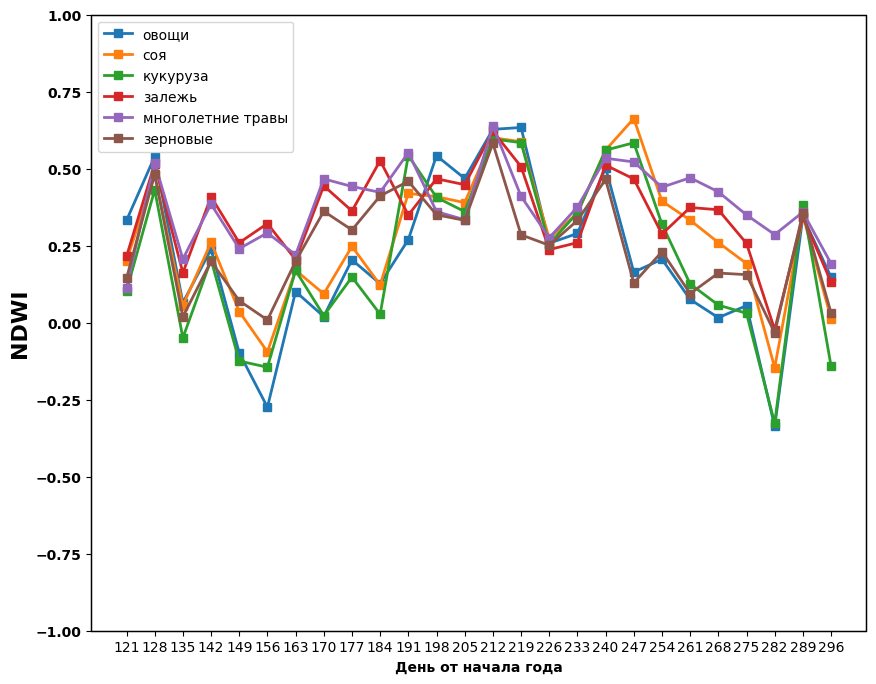

In [11]:
cul = list(df_ndwi['culture'].unique().tolist())
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDWI',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([-1, 1])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_ndwi.loc[(df_ndwi['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

In [12]:
df_new = pd.DataFrame()
for cul in df_features.columns:
    if str(cul)[-4:] == '_NEW':
        df_new[cul] = df_features[cul]
df_new['culture'] = df_features['culture']

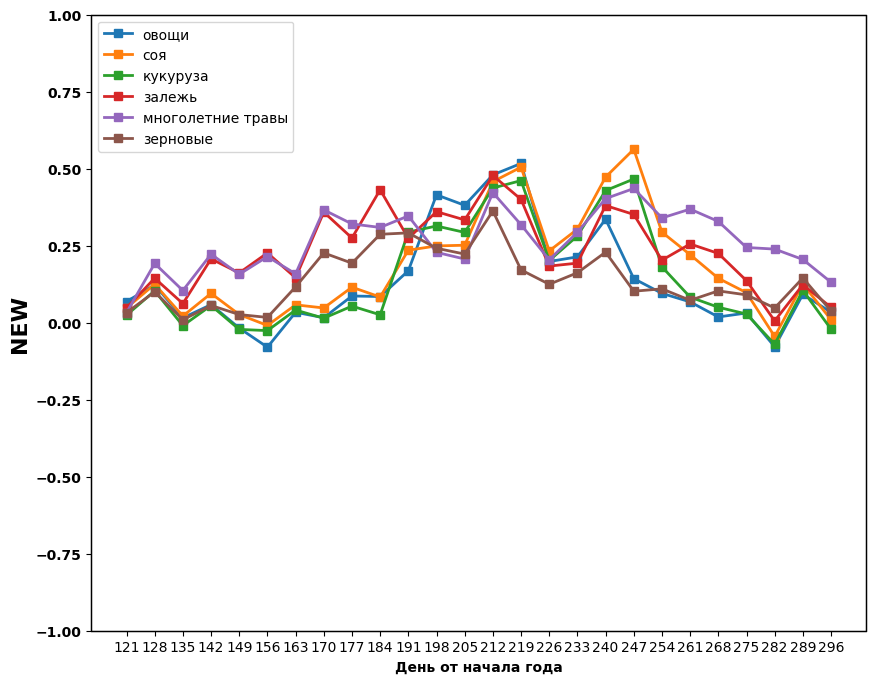

In [13]:
cul = list(df_new['culture'].unique().tolist())
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NEW',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([-1, 1])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_new.loc[(df_new['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

In [14]:
df_features.shape

(7261, 79)

df_features - итоговый датасет для обучения, пропуски заполнены линейной интерполяцией, выбросы в некоторых днях заполнены подобным способом, добавлены новые признаки

In [15]:
from sklearn.preprocessing import StandardScaler
encoder = OneHotEncoder()
x = df_features.drop(columns=["culture"])
standardizer = StandardScaler()
x = standardizer.fit_transform(x)

y = pd.DataFrame(encoder.fit_transform(df_features[['culture']]).toarray(), columns=encoder.get_feature_names_out(['culture']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
import keras
from keras.layers import Input, Dense, Normalization, Dropout, BatchNormalization
from keras.models import Model

inputs = Input(shape=(78,))
output_1 = Dense(128)(inputs)
output_1 = BatchNormalization()(output_1)
output_1 = keras.activations.relu(output_1)

output_2 = Normalization()(output_1)
output_3 = Dense(512)(output_2)
output_3 = BatchNormalization()(output_3)
output_3 = keras.activations.relu(output_3)

output_4 = Dropout(0.7)(output_3)
output_5 = Dense(256)(output_4)
output_5 = BatchNormalization()(output_5)
output_5 = keras.activations.relu(output_5)

output_6 = Dropout(0.6)(output_5)
output_7 = Dense(128)(output_6)
output_7 = BatchNormalization()(output_7)
output_7 = keras.activations.relu(output_7)

output_8 = Dropout(0.5)(output_7)
output_9 = Dense(64)(output_8)
output_9 = BatchNormalization()(output_8)
output_9 = keras.activations.relu(output_8)

output_10 = Dense(6)(output_9)
predictions = Dense(6, activation='softmax')(output_10)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Epoch 1/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3014 - loss: 1.8755 - val_accuracy: 0.7832 - val_loss: 0.9160
Epoch 2/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5901 - loss: 1.1029 - val_accuracy: 0.8321 - val_loss: 0.5619
Epoch 3/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7131 - loss: 0.8339 - val_accuracy: 0.8761 - val_loss: 0.3915
Epoch 4/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7851 - loss: 0.6385 - val_accuracy: 0.9092 - val_loss: 0.2962
Epoch 5/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8334 - loss: 0.5271 - val_accuracy: 0.9284 - val_loss: 0.2327
Epoch 6/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8725 - loss: 0.4163 - val_accuracy: 0.9422 - val_loss: 0.1947
Epoch 7/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.3922 - val_accuracy: 0.9491 - val_loss: 0.1723
Epoch 8/80
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8873 - loss: 0.3420 - val_accuracy: 0.

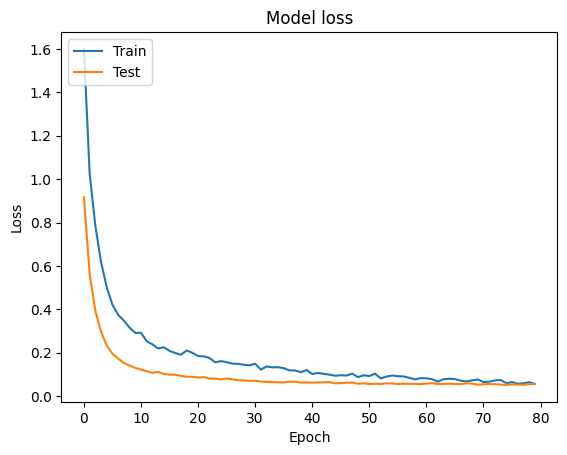

In [17]:
import matplotlib.pyplot as plt 
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Классификация открытой части датасета

In [41]:
df_ndvi_test = pd.read_csv('test _new/test_public/NDVI.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_nir_test = pd.read_csv('test _new/test_public/B8A.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_swir_test = pd.read_csv('test _new/test_public/B12.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_features_test = df_ndvi_test.copy()

In [42]:
for day in xx:
    df_features_test[f"{day}_NDWI"] = (df_nir_test[day] - df_swir_test[day]) / (df_nir_test[day] + df_swir_test[day])
    df_features_test[f"{day}_NEW"] = df_ndvi_test[day] * df_features_test[f"{day}_NDWI"]
    #df_features_test[f"{day}_GNDVI"] = (df_nir_test[day] - df_green_test[day]) / (df_nir_test[day] + df_green_test[day])

In [43]:
x = df_features_test
standardizer = StandardScaler()
x = standardizer.fit_transform(x)


ans_test = model.predict(x)
pred_ans_test = np.zeros_like(ans_test).astype("int32")
pred_ans_test[np.arange(len(ans_test)), ans_test.argmax(1)] = 1

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
with open("classification_openset.csv", encoding="windows-1251", mode="w") as file:  # Запись ответов в файл
    file.write("culture\n")
    for row in encoder.inverse_transform(pred_ans_test):
        file.write(f"{row[0]}\n")

Классификация закрытой части датасета

In [46]:
df_ndvi_test = pd.read_csv('final_test/NDVI.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_nir_test = pd.read_csv('final_test/B8A.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_swir_test = pd.read_csv('final_test/B12.csv', sep=";", encoding="windows-1251").drop(columns=['index'])
df_features_test = df_ndvi_test.copy()

In [47]:
for day in xx:
    df_features_test[f"{day}_NDWI"] = (df_nir_test[day] - df_swir_test[day]) / (df_nir_test[day] + df_swir_test[day])
    df_features_test[f"{day}_NEW"] = df_ndvi_test[day] * df_features_test[f"{day}_NDWI"]

In [48]:
x = df_features_test
standardizer = StandardScaler()
x = standardizer.fit_transform(x)


ans_test = model.predict(x)
pred_ans_test = np.zeros_like(ans_test).astype("int32")
pred_ans_test[np.arange(len(ans_test)), ans_test.argmax(1)] = 1

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
with open("classification_closeset.csv", encoding="windows-1251", mode="w") as file:  # Запись ответов в файл
    file.write("culture\n")
    for row in encoder.inverse_transform(pred_ans_test):
        file.write(f"{row[0]}\n")

In [50]:
import pickle

filename = 'func_model.pkl'
pickle.dump(model, open(filename, 'wb'))